# Module 2 : Data Analysis - Insights

### 1. Importing required libraries and loading all csv files created in module 1

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime

In [2]:
df_demo = pd.read_csv('CustomerDemographic.csv',index_col=0)
df_custadd = pd.read_csv('CustomerAddress.csv',index_col=0)
df_transaction = pd.read_csv('Transactions.csv',index_col=0)
df_newcustomer = pd.read_csv('NewCustomerList.csv',index_col=0)

In [3]:
df_demo.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name,age
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine-Medendorp,69
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli-Bockman,42
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin-Dearle,68


In [4]:
df_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,2863.000000,2863.000000,2863.000000,2863.000000
mean,1965.637094,49.487950,10.678659,44.723367
std,1150.460920,28.813828,5.675673,12.522111
min,1.000000,0.000000,1.000000,20.000000
25%,969.500000,25.000000,6.000000,35.000000
50%,1956.000000,49.000000,11.000000,45.000000
75%,2955.500000,74.000000,16.000000,54.000000
max,3997.000000,99.000000,22.000000,87.000000


### 2. Adding new column

In [5]:
# dividing age into age range and creating new column

df_demo['age_range'] = pd.cut(df_demo['age'], bins=4)

### 3. Visulaising Data

### Age and gender-wise analysis
Now, we will analyse that customer's age makes a difference in profit or bike purchasing together with gender. 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

**Age distribution among old and new customers

Text(0.5, 1.0, 'Age distribution of old customers')

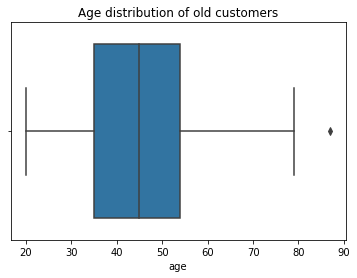

In [7]:
sns.boxplot(x='age', data = df_demo)
plt.title('Age distribution of old customers')

**Gender distribution amongst old and new customers

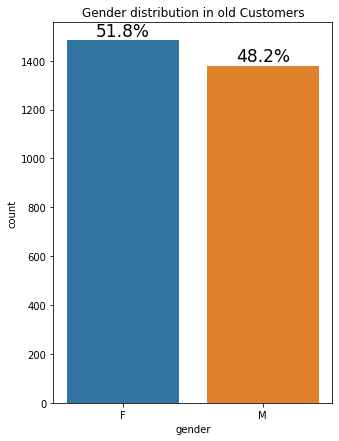

In [8]:
plt.figure(figsize=(5,7))
g = sns.countplot(df_demo['gender'])
plt.title('Gender distribution in old Customers')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='17')

Bike purchased in past 3 years by old and new customer anlayzing by age a

Text(0.5, 1.0, 'Age-wise bike purchase in past 3 years by old customers')

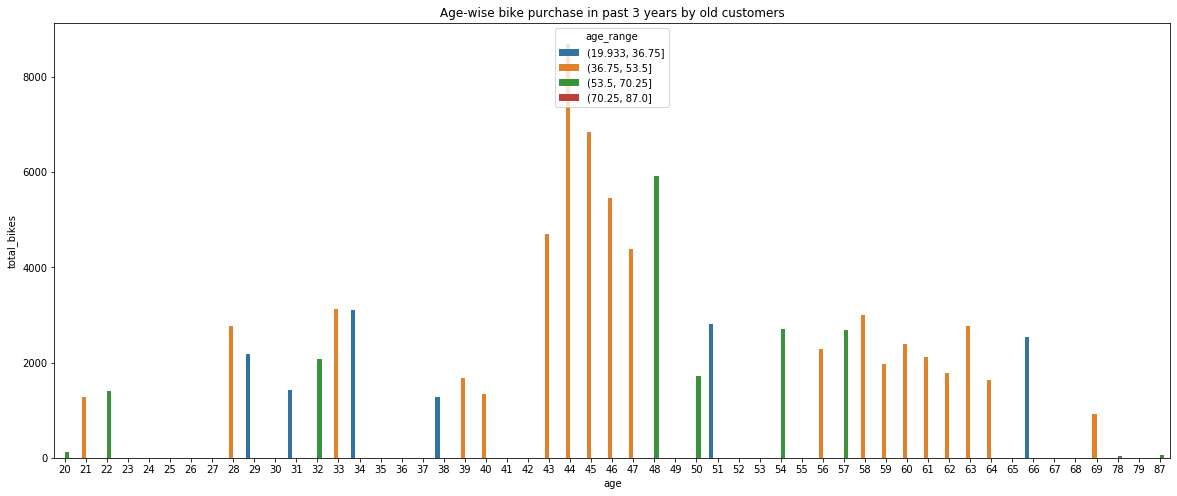

In [9]:
bike_df = df_demo.groupby('age')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(20,8))
ax = sns.barplot(x = bike_df['age'], y = bike_df['total_bikes'], hue= df_demo['age_range'], data = bike_df)
plt.title('Age-wise bike purchase in past 3 years by old customers')

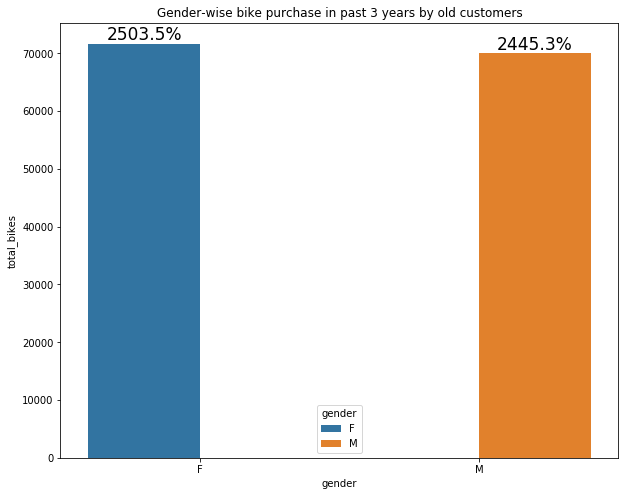

In [10]:
bike_df = df_demo.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(10,8))
g = sns.barplot(x = bike_df['gender'], y = bike_df['total_bikes'], hue= df_demo['gender'], data = bike_df)
plt.title('Gender-wise bike purchase in past 3 years by old customers')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='17')

In [11]:
df_custadd.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [12]:
df_custadd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 218.7+ KB


### 4. Merging customer demographic with customer address in new dataframe

In [13]:
new_df = df_demo.merge(df_custadd, on = 'customer_id', how = 'inner')

In [14]:
new_df.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name,age,age_range,address,postcode,state,country,property_valuation
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine-Medendorp,69,"(53.5, 70.25]",060 Morning Avenue,2016,NSW,Australia,10
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli-Bockman,42,"(36.75, 53.5]",6 Meadow Vale Court,2153,NSW,Australia,10
2,9,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,Mala-Lind,49,"(36.75, 53.5]",97736 7th Trail,2023,NSW,Australia,12


Now after having age of each customer, we don't need DOB, so we'll drop that column from the table

In [15]:
new_df.drop(['DOB'], axis = 1)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name,age,age_range,address,postcode,state,country,property_valuation
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine-Medendorp,69,"(53.5, 70.25]",060 Morning Avenue,2016,NSW,Australia,10
1,2,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli-Bockman,42,"(36.75, 53.5]",6 Meadow Vale Court,2153,NSW,Australia,10
2,9,F,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,Mala-Lind,49,"(36.75, 53.5]",97736 7th Trail,2023,NSW,Australia,12
3,12,M,58,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,Sawyere-Flattman,28,"(19.933, 36.75]",44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,M,38,Developer I,Financial Services,High Net Worth,N,Yes,8.0,Gabriele-Norcross,67,"(53.5, 70.25]",2 Sutherland Street,3799,VIC,Australia,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,3993,F,6,Librarian,Entertainment,Mass Customer,N,No,10.0,Andi-Dumelow,48,"(36.75, 53.5]",681 Elmside Place,3750,VIC,Australia,6
2857,3994,F,5,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0,Stephie-Byars,33,"(19.933, 36.75]",2918 Summer Ridge Hill,3030,VIC,Australia,2
2858,3995,M,93,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,Rusty-Iapico,47,"(36.75, 53.5]",613 Erie Lane,2088,NSW,Australia,12
2859,3996,F,8,VP Product Management,Health,Mass Customer,N,No,19.0,Rosalia-Halgarth,47,"(36.75, 53.5]",0 Transport Center,3977,VIC,Australia,6


In [16]:
new_df.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
age                                    0
age_range                              0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

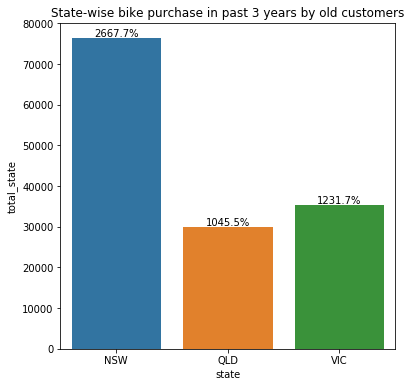

In [17]:
car_df = new_df.groupby('state')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_state')
plt.figure(figsize=(6,6))
g = sns.barplot(x = car_df['state'], y = car_df['total_state'], data = car_df)
plt.title('State-wise bike purchase in past 3 years by old customers')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='10')

In [18]:
df_transaction.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit Margin
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61


In [19]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  float64
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  float64
 12  product_first_sold_date  19445 non-null  object 
 13  Profit Margin            19445 non-null  float64
dtypes: float64(4), int64(3

### Format changing 

We can see here the product first sold date is not in right readable format, so we will correct it

In [20]:
df_transaction['product_first_sold_date'] = pd.to_datetime(df_transaction['product_first_sold_date']).dt.date

In [21]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  float64
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  float64
 12  product_first_sold_date  19445 non-null  object 
 13  Profit Margin            19445 non-null  float64
dtypes: float64(4), int64(3

### Adding new column 'Profit Margin' to check the profile on transaction 

In [22]:
df_transaction['Profit Margin'] = df_transaction['list_price'] - df_transaction['standard_cost']
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit Margin
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,1055.82


### merging new dataframe with transaction and creating a dataframe with all three updated files

In [23]:
df_demoaddtrans = new_df.merge(df_transaction, on = 'customer_id', how = 'inner')

In [58]:
# saving this new merged dataframe into csv file
df_demoaddtrans.to_csv('DemoAddTrans.csv')

In [24]:
df_demoaddtrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14044 entries, 0 to 14043
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          14044 non-null  int64   
 1   gender                               14044 non-null  object  
 2   past_3_years_bike_related_purchases  14044 non-null  int64   
 3   DOB                                  14044 non-null  object  
 4   job_title                            14044 non-null  object  
 5   job_industry_category                14044 non-null  object  
 6   wealth_segment                       14044 non-null  object  
 7   deceased_indicator                   14044 non-null  object  
 8   owns_car                             14044 non-null  object  
 9   tenure                               14044 non-null  float64 
 10  full_name                            14044 non-null  object  
 11  age            

Now we'll calculate number of transaction with the customers on the basis of car ownership

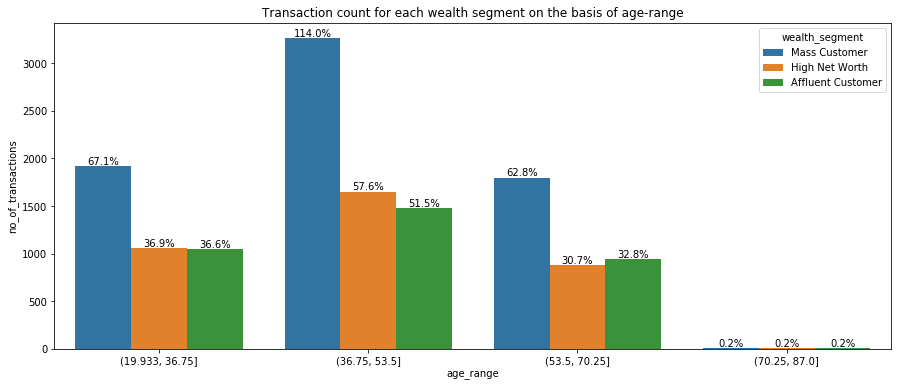

In [25]:
wealth_df = df_demoaddtrans.groupby(['age_range', 'wealth_segment'])['transaction_id'].count().reset_index(name='no_of_transactions').sort_values(by=['no_of_transactions'], ascending=False)

plt.figure(figsize=(15,6))
g = sns.barplot(x = wealth_df['age_range'], y = wealth_df['no_of_transactions'], hue = wealth_df['wealth_segment'])
plt.title('Transaction count for each wealth segment on the basis of age-range')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='10')

In [26]:
cars = df_demoaddtrans.groupby('state')['owns_car'].value_counts().reset_index(name='count_owns_car')
cars

,state,owns_car,count_owns_car
0,NSW,Yes,3791
1,NSW,No,3637
2,QLD,No,1555
3,QLD,Yes,1555
4,VIC,Yes,1765
5,VIC,No,1741


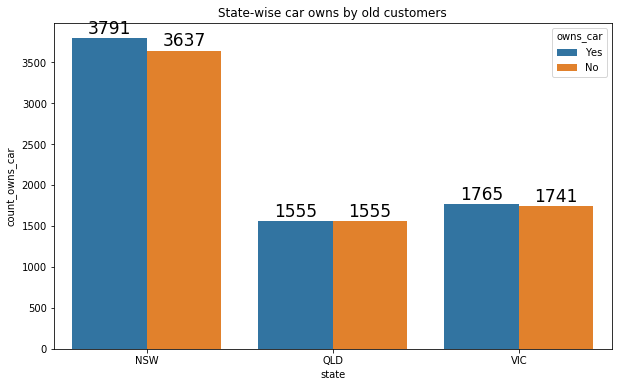

In [27]:
plt.figure(figsize=(10,6))

g = sns.barplot(x = cars['state'], y = cars['count_owns_car'], hue= cars['owns_car'], data = cars)
plt.title('State-wise car owns by old customers')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

**customer_id :** Unique ID for each customer <br>
**transaction_id :** Unique ID for every time a consumer orders <br>
**product_id :** Unique ID for each product <br>
**transaction_date :** Date, when the transaction is made <br>
**list_price :** The price listed for each product for customers to buy <br>
**standard_cost :** The ground cost of the product, that costs to the seller <br>
**product_first_sold_date:** when the product is been ordered <br>
**Profit_Margin :** How much the company earn by selling the product <br>
**State:** Location, where the transaction happened

In [28]:
dff = df_demoaddtrans[['customer_id','age_range','transaction_id','transaction_date','product_id','list_price','standard_cost','product_first_sold_date','Profit Margin','state']]
dff

,customer_id,age_range,transaction_id,transaction_date,product_id,list_price,standard_cost,product_first_sold_date,Profit Margin,state
0,1,"(53.5, 70.25]",94,2017-12-23,86,235.63,125.07,1970-01-01,110.56,NSW
1,1,"(53.5, 70.25]",3765,2017-04-06,38,1577.53,826.51,1970-01-01,751.02,NSW
2,1,"(53.5, 70.25]",5157,2017-05-11,47,1720.70,1531.42,1970-01-01,189.28,NSW
3,1,"(53.5, 70.25]",9785,2017-01-05,72,360.40,270.30,1970-01-01,90.10,NSW
4,1,"(53.5, 70.25]",13424,2017-02-21,2,71.49,53.62,1970-01-01,17.87,NSW
...,...,...,...,...,...,...,...,...,...,...
14039,3496,"(19.933, 36.75]",9769,2017-03-07,5,574.64,459.71,1970-01-01,114.93,NSW
14040,3496,"(19.933, 36.75]",18797,2017-04-02,16,1661.92,1479.11,1970-01-01,182.81,NSW
14041,3497,"(19.933, 36.75]",6926,2017-11-08,1,1403.50,954.82,1970-01-01,448.68,VIC
14042,3497,"(19.933, 36.75]",8276,2017-09-01,18,575.27,431.45,1970-01-01,143.82,VIC


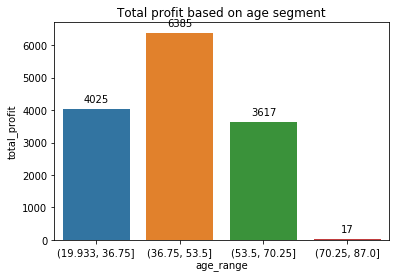

In [29]:
df_grouped = dff.groupby('age_range')['Profit Margin'].count().reset_index(name='total_profit')
plt.figure(figsize=(6,4))
g = sns.barplot(df_grouped['age_range'], df_grouped['total_profit'])
plt.title('Total profit based on age segment')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='10', textcoords = 'offset points')

In [30]:
df_grouped = dff.groupby(['age_range', 'product_id'])['Profit Margin'].sum().reset_index(name='total_profit')
df=df_grouped.sort_values(by = 'total_profit',ascending=False).head(5)
df

,age_range,product_id,total_profit
104,"(36.75, 53.5]",3,223034.05
3,"(19.933, 36.75]",3,110665.75
205,"(53.5, 70.25]",3,107260.65
139,"(36.75, 53.5]",38,95237.19
158,"(36.75, 53.5]",57,89663.75


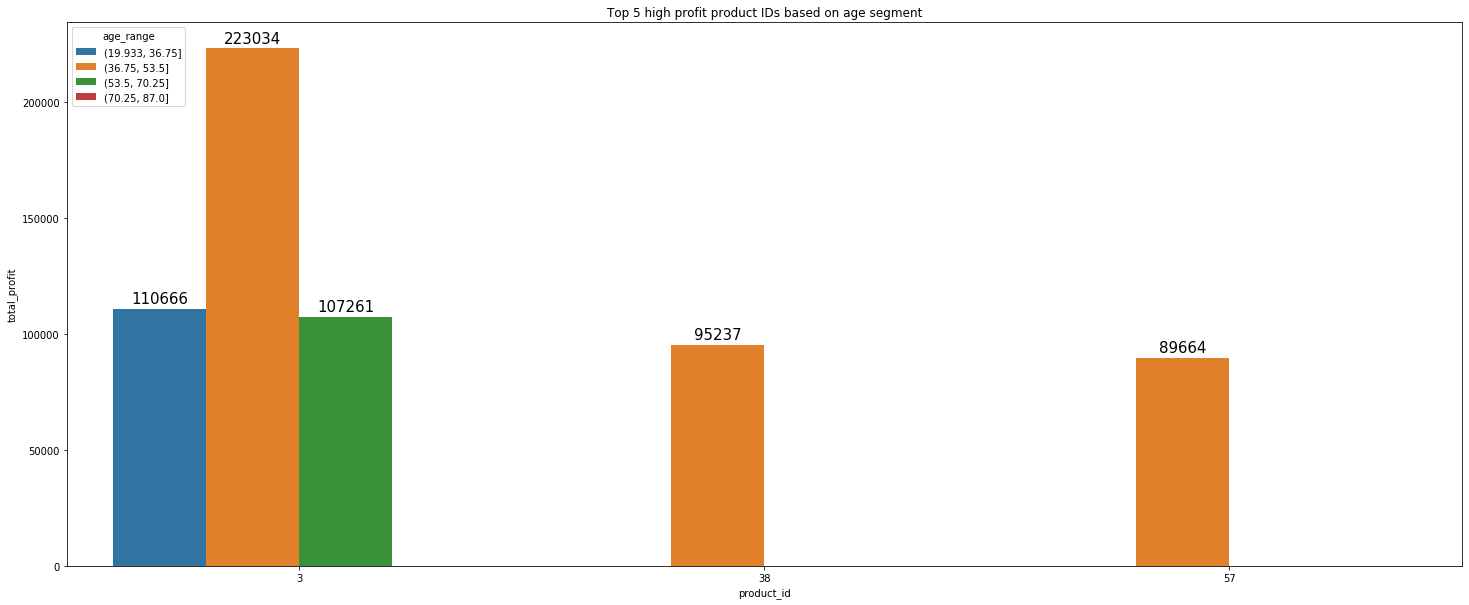

In [31]:
plt.figure(figsize=(25,10))
g = sns.barplot(df['product_id'], df_grouped['total_profit'], hue = df['age_range'])
plt.title('Top 5 high profit product IDs based on age segment')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='15', textcoords = 'offset points')

In [32]:
dff['month'] = pd.to_datetime(dff['transaction_date']).dt.month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


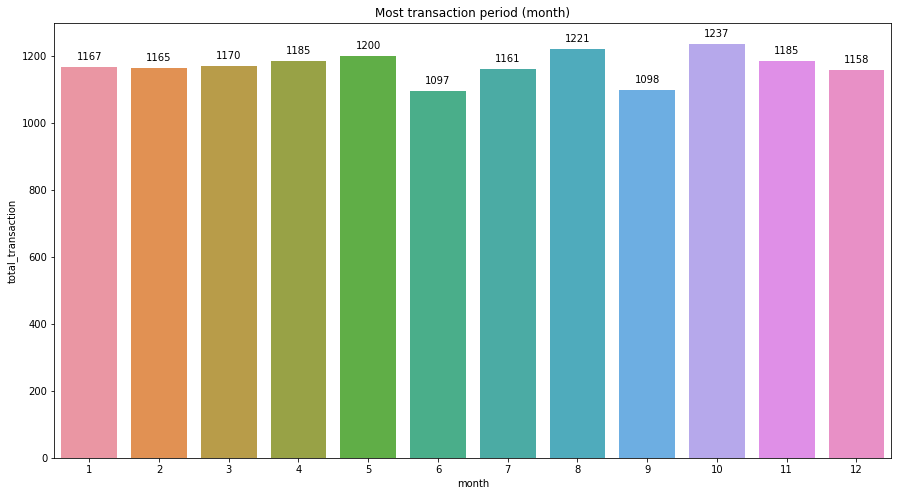

In [33]:
df_grouped = dff.groupby('month')['transaction_id'].count().reset_index(name='total_transaction')
plt.figure(figsize=(15,8))
g = sns.barplot(df_grouped['month'], df_grouped['total_transaction'])
plt.title('Most transaction period (month)')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='10', textcoords = 'offset points')

### We will analyse data based on RFM (menthod used for analyzing customer value)
**Recency:** when is the last time the user takes an action (e.g., login, place an order)?

**Frequency:** how many times does the user take this action?

**Monetary value:** what is the sum of monetary value from this user throughout his/her lifetime?

In [34]:
# to find recent transaction date
date = pd.to_datetime(dff['transaction_date']).dt.date.max()

# to find the recency for transaction
dff['Recency'] = pd.to_datetime(dff['transaction_date']).dt.date.apply(lambda row:(date - row))

dff['Recency'] = dff['Recency'].dt.days
dff

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,customer_id,age_range,transaction_id,transaction_date,product_id,list_price,standard_cost,product_first_sold_date,Profit Margin,state,month,Recency
0,1,"(53.5, 70.25]",94,2017-12-23,86,235.63,125.07,1970-01-01,110.56,NSW,12,7
1,1,"(53.5, 70.25]",3765,2017-04-06,38,1577.53,826.51,1970-01-01,751.02,NSW,4,268
2,1,"(53.5, 70.25]",5157,2017-05-11,47,1720.70,1531.42,1970-01-01,189.28,NSW,5,233
3,1,"(53.5, 70.25]",9785,2017-01-05,72,360.40,270.30,1970-01-01,90.10,NSW,1,359
4,1,"(53.5, 70.25]",13424,2017-02-21,2,71.49,53.62,1970-01-01,17.87,NSW,2,312
...,...,...,...,...,...,...,...,...,...,...,...,...
14039,3496,"(19.933, 36.75]",9769,2017-03-07,5,574.64,459.71,1970-01-01,114.93,NSW,3,298
14040,3496,"(19.933, 36.75]",18797,2017-04-02,16,1661.92,1479.11,1970-01-01,182.81,NSW,4,272
14041,3497,"(19.933, 36.75]",6926,2017-11-08,1,1403.50,954.82,1970-01-01,448.68,VIC,11,52
14042,3497,"(19.933, 36.75]",8276,2017-09-01,18,575.27,431.45,1970-01-01,143.82,VIC,9,120


In [35]:
from pandas.core.reshape.concat import concat

df_grouped = dff.groupby('customer_id')['Recency'].min().reset_index(name='Recency')
df_grouped1 = dff.groupby('customer_id')['product_id'].count().reset_index(name='No_of_products')
df_grouped2 = dff.groupby('customer_id')['Profit Margin'].sum().reset_index(name='Total_profit')
merged_table = df_grouped.merge(df_grouped1, on = 'customer_id', how = 'inner').merge(df_grouped2, on = 'customer_id', how = 'inner')
merged_table.set_index('customer_id', inplace = True)
merged_table

,Recency,No_of_products,Total_profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38
...,...,...,...
3493,93,6,3728.88
3494,4,4,2755.11
3495,13,7,3847.65


Now we’re going to determine the r_quartile, f_quartile and m_quartile with RFM score at which customers buy the products.

In [36]:
# RFM_score : quartile values
quantiles = merged_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 45.0, 0.75: 87.0},
 'No_of_products': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'Total_profit': {0.25: 1784.3200000000002, 0.5: 2799.26, 0.75: 4090.05}}

In [37]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [38]:
merged_table['r_quartile'] = merged_table['Recency'].apply(RScore, args=('Recency',quantiles,))
merged_table['f_quartile'] = merged_table['No_of_products'].apply(FMScore, args=('No_of_products',quantiles,))
merged_table['m_quartile'] = merged_table['Total_profit'].apply(FMScore, args=('Total_profit',quantiles,))
merged_table.head()

,Recency,No_of_products,Total_profit,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
9,78,6,2353.11,2,3,2
12,67,7,3540.03,2,3,3
13,27,7,4337.38,3,3,4


In [39]:
merged_table['RFM_Score'] = 100 * merged_table['r_quartile'] + 10 * merged_table['f_quartile'] + merged_table['m_quartile']
merged_table.head()

,Recency,No_of_products,Total_profit,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
9,78,6,2353.11,2,3,2,232
12,67,7,3540.03,2,3,3,233
13,27,7,4337.38,3,3,4,334


Calculating here the most frequent buyers, who can be the potential buyer for future and more likely will respond on an offer<br>
**Diamond customer** Max - Most frequent buyer<br>
**Platinum customer** higher quartile - second most frequent buyers<br>
**Gold customer** Median - moderate buyers, who has chance to come back<br>
**Silver customer** Lower quartile - has rare chance to come back<br>
**Brownz customer** Minimum - the buyers who come once or twice and not likely to come back<br>

In [40]:
quantiles = merged_table.quantile(q=[0.0,0.25,0.5,0.75,1.00])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.0: 0.0, 0.25: 18.0, 0.5: 45.0, 0.75: 87.0, 1.0: 353.0},
 'No_of_products': {0.0: 1.0, 0.25: 4.0, 0.5: 5.0, 0.75: 7.0, 1.0: 14.0},
 'Total_profit': {0.0: 15.080000000000005,
  0.25: 1784.3200000000002,
  0.5: 2799.26,
  0.75: 4090.05,
  1.0: 11668.949999999999},
 'r_quartile': {0.0: 1.0, 0.25: 2.0, 0.5: 3.0, 0.75: 4.0, 1.0: 4.0},
 'f_quartile': {0.0: 1.0, 0.25: 1.0, 0.5: 2.0, 0.75: 3.0, 1.0: 4.0},
 'm_quartile': {0.0: 1.0, 0.25: 1.0, 0.5: 2.0, 0.75: 3.0, 1.0: 4.0},
 'RFM_Score': {0.0: 111.0, 0.25: 211.0, 0.5: 311.0, 0.75: 411.0, 1.0: 444.0}}

In [41]:
def category_assignment(x,p,df):
    if x == df[p][0.00]:
        return "Brownz customer"
    elif (x >= df[p][0.00] and x < df[p][0.25]):
        return "Silver customer"
    elif (x >= df[p][0.25] and x < df[p][0.50]):
        return "Gold customer"
    elif (x >= df[p][0.50] and x < df[p][0.75]):
        return 'Platunum customer'  
    else:
        return 'Diamond Customer'

In [42]:
merged_table['customer_category'] = merged_table['RFM_Score'].apply(category_assignment, args=('RFM_Score', quantiles))
merged_table

,Recency,No_of_products,Total_profit,r_quartile,f_quartile,m_quartile,RFM_Score,customer_category
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Diamond Customer
2,128,3,2226.26,1,1,2,112,Silver customer
9,78,6,2353.11,2,3,2,232,Gold customer
12,67,7,3540.03,2,3,3,233,Gold customer
13,27,7,4337.38,3,3,4,334,Platunum customer
...,...,...,...,...,...,...,...,...
3493,93,6,3728.88,1,3,3,133,Silver customer
3494,4,4,2755.11,4,1,2,412,Diamond Customer
3495,13,7,3847.65,4,3,3,433,Diamond Customer


In [59]:
# saving merged dataframe as csv file
merged_table.to_csv('SegmentedCustomer.csv')

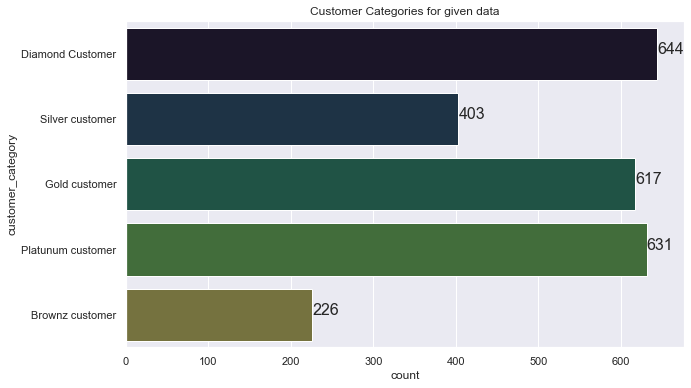

In [43]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)

plt.title('Customer Categories for given data')

g = sns.countplot(y = merged_table['customer_category'], palette=sns.color_palette("cubehelix", 10))
for p in g.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(value, (x, y), size=16)
plt.show()


Text(0, 0.5, 'Monetary Value')

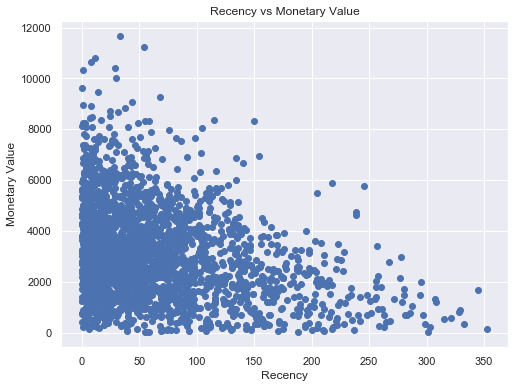

In [44]:
plt.figure(figsize=(8,6))
plt.title('Recency vs Monetary Value')

plt.scatter(merged_table['Recency'], merged_table['Total_profit'])
plt.xlabel('Recency')
plt.ylabel('Monetary Value')

Text(0, 0.5, 'Frequency')

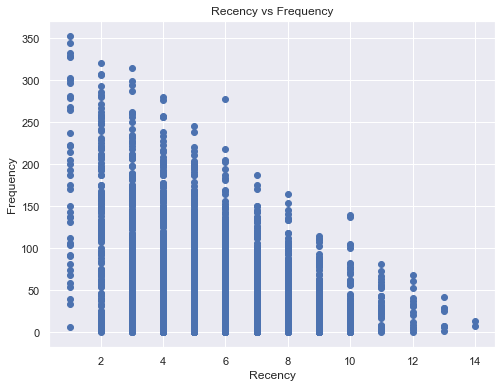

In [45]:
plt.figure(figsize=(8,6))
plt.title('Recency vs Frequency')

plt.scatter(merged_table['No_of_products'], merged_table['Recency'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Monetary Value')

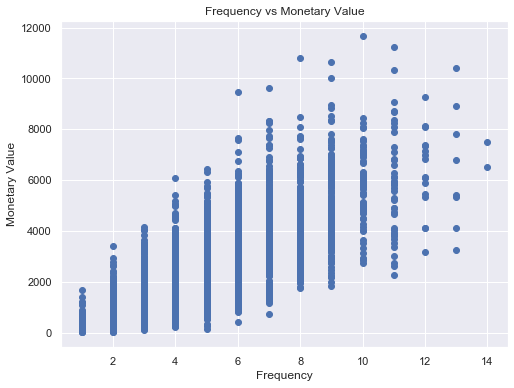

In [46]:
plt.figure(figsize=(8,6))
plt.title('Frequency vs Monetary Value')

plt.scatter(merged_table['No_of_products'], merged_table['Total_profit'])
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')

In [47]:
df_newcustomer.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,65
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,52
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875,48


In [48]:
df_newcustomer['gender'].value_counts()

Female    369
Male      346
Name: gender, dtype: int64

In [49]:
df_newcustomer['state'].value_counts()

NSW    352
VIC    197
QLD    166
Name: state, dtype: int64

In [50]:
df_newcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           715 non-null    object 
 1   last_name                            715 non-null    object 
 2   gender                               715 non-null    object 
 3   past_3_years_bike_related_purchases  715 non-null    int64  
 4   DOB                                  715 non-null    object 
 5   job_title                            715 non-null    object 
 6   job_industry_category                715 non-null    object 
 7   wealth_segment                       715 non-null    object 
 8   deceased_indicator                   715 non-null    object 
 9   owns_car                             715 non-null    object 
 10  tenure                               715 non-null    int64  
 11  address                         

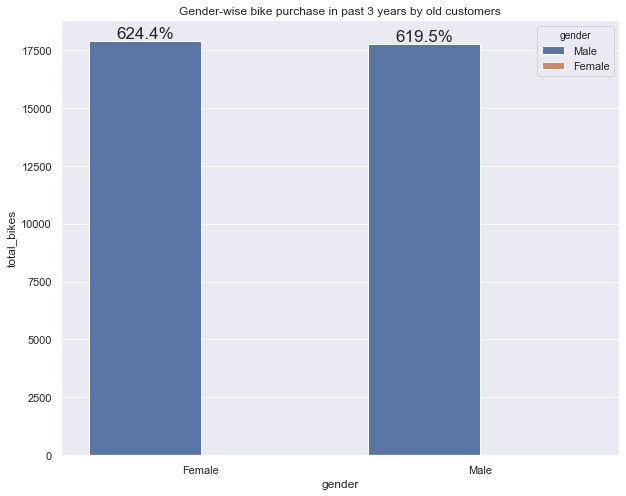

In [51]:
bike_df = df_newcustomer.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(10,8))
g = sns.barplot(x = bike_df['gender'], y = bike_df['total_bikes'], hue= df_newcustomer['gender'], data = bike_df)
plt.title('Gender-wise bike purchase in past 3 years by old customers')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='17')

In [52]:
df_newcustomer['age_range'] = pd.cut(df_newcustomer['age'], bins=4)

Text(0.5, 1.0, 'Age-wise bike purchase in past 3 years by new customers')

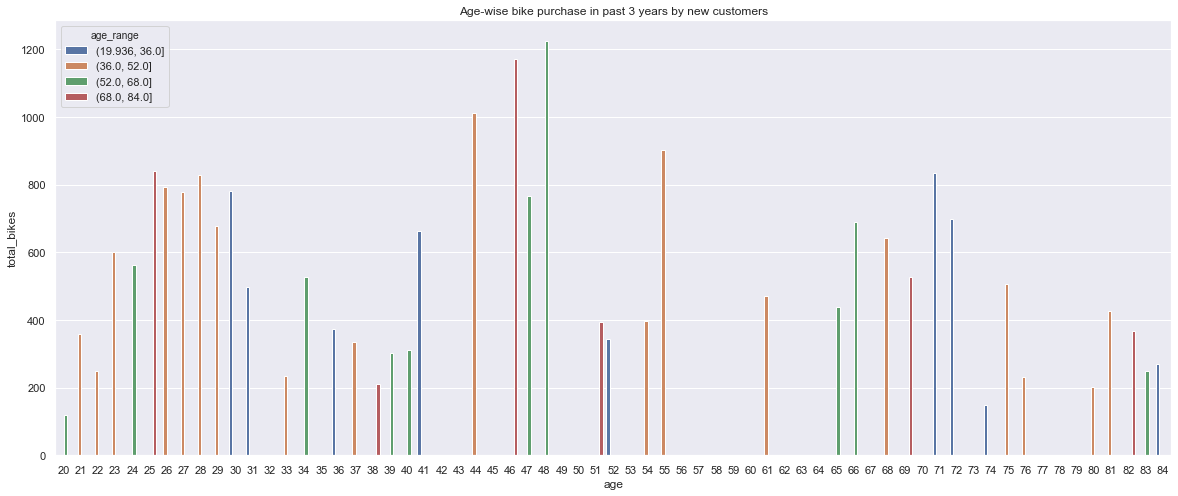

In [53]:
bike_df1 = df_newcustomer.groupby('age')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(20,8))
ax = sns.barplot(x = bike_df1['age'], y = bike_df1['total_bikes'], hue= df_newcustomer['age_range'], data = bike_df1)
plt.title('Age-wise bike purchase in past 3 years by new customers')

In [54]:
job = df_newcustomer.groupby('job_industry_category')['first_name'].count().reset_index(name='job_industry')
job.set_index('job_industry_category', inplace = True)
job

,job_industry
job_industry_category,
Argiculture,23
Entertainment,32
Financial Services,182
Health,135
IT,29
Manufacturing,171
Property,49
Retail,73
Telecommunications,21


Text(0.5, 1.0, 'New customers job industry distribution')

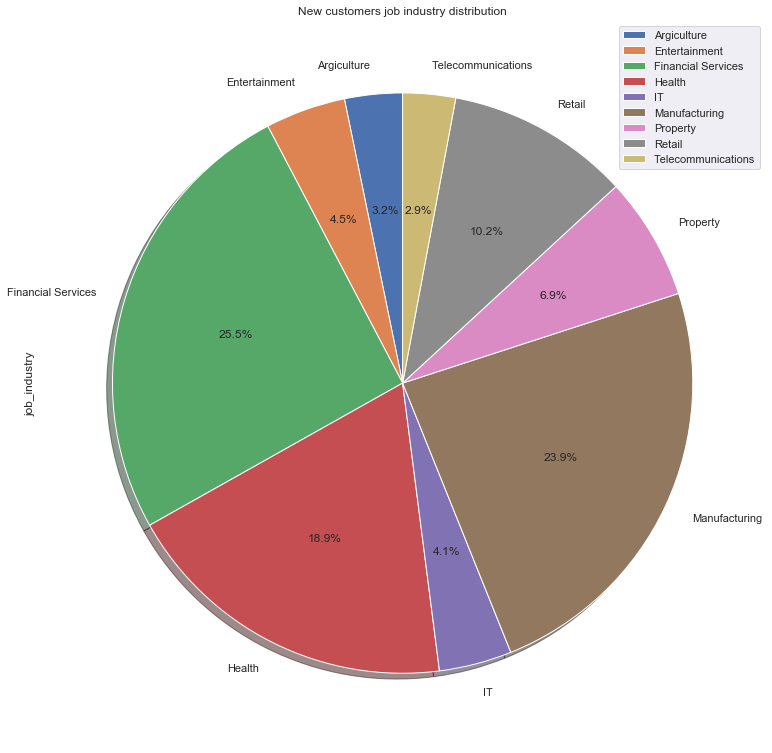

In [55]:
job.groupby(['job_industry_category']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(13,20), autopct='%1.1f%%')
plt.title('New customers job industry distribution')

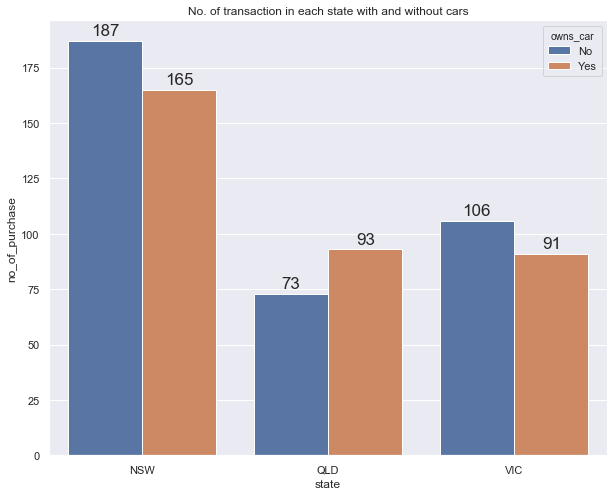

In [56]:
df_grouped = df_newcustomer.groupby(['state', 'owns_car'])['past_3_years_bike_related_purchases'].count().reset_index(name='no_of_purchase')

plt.figure(figsize=(10,8))
g = sns.barplot(df_grouped['state'], df_grouped['no_of_purchase'], hue=df_grouped['owns_car'])
plt.title('No. of transaction in each state with and without cars')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

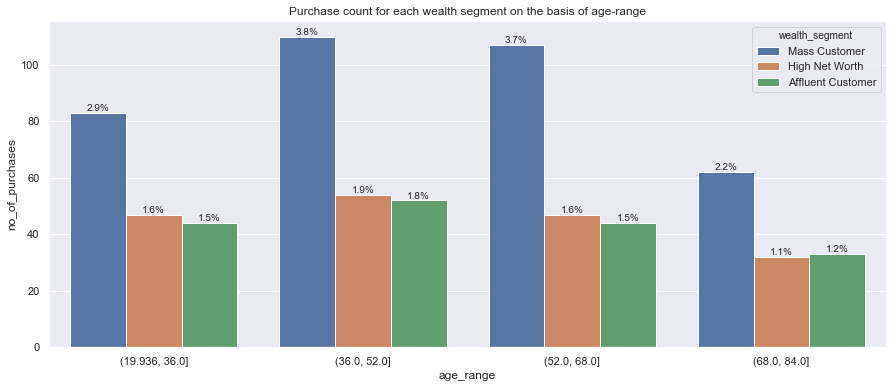

In [57]:
wealth_df = df_newcustomer.groupby(['age_range', 'wealth_segment'])['past_3_years_bike_related_purchases'].count().reset_index(name='no_of_purchases').sort_values(by=['no_of_purchases'], ascending=False)

plt.figure(figsize=(15,6))
g = sns.barplot(x = wealth_df['age_range'], y = wealth_df['no_of_purchases'], hue = wealth_df['wealth_segment'])
plt.title('Purchase count for each wealth segment on the basis of age-range')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='10')